<p style="font-size:160%;font-family:georgia;color:navy">
    <strong>
        Term Deposit Marketing Campaign
        </strong>
    </p>


<p style="font-size:120%;font-family:georgia">
    In this project we will predict the likelihood of a subscription to a term depoist for an existing clients of a bank upon a call marketing campaign.
    <br>The sample data set we will use to build our model is results from similar marketing campaigns from May 2008 and November 2010.
    <br>
    <br>To model this event (subscribe to term depost, or not), which is a classification problem, we will split this data set into a training and testing subsets, fit a logistic regression model to the training subset, and test the model on the testing subset.
    <br>
    <br>We will use several spliting and testing subsets to compare results. Also, we will test the accuracy of the prediction by comparing it to some basic models, like the percentage of subscribers vs. non-subscribers to the term deposit.
    <br>
    <br>The data set contains 41 thousands observation, 20 features for each observation.
    </p>

<p style="font-size:160%;font-family:georgia;color:navy">
    <strong>Content:</strong>
    </p>

- [Exploring-Feature](#exploring-feature)
    - [Age](#age)
    - [Job](#job)
    - [Marital-Status](#marital)
    - [Education](#education)
    - [Other-Features](#other)
- [Features-Target-Relation](#feat_tar_rltn)
	- [Jobs-on-Conversion](#job_y)
	- [Marital-on-Conversion](#marital_y)
	- [Education-on-Conversion](#education_y)
    - [Month-of-Call-on-Conversion](#month_y)
    - [Features-Pre.Model-Conclusion](#conc)

---
<p style="font-size:160%;font-family:georgia;color:navy">
    <strong>
        Features
        <br>
        </strong>
    </p>

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn import metrics;

<p style="font-size:160%;font-family:georgia;color:navy">
    <strong>
        1. Reading the Data - Bais Data Set Information
        </strong>
    </p>

In [2]:
df = pd.read_csv('./data/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

<a id="exploring-feature"></a>
<p style="font-size:160%;font-family:georgia;color:navy">
    <strong>
        2. Data Exploration
        <br>
        <br>2.1. Target (y)
        </strong>
    </p>
    
<p style="font-size:120%;font-family:georgia;color:black">
    Sample target results are inbalanced (fig.1).
    <br>
    <br>88.7% of calls did not result a sale. 11.3% of calls resulted in a sale.
    <br>
    <br>We can use this split as our base model; we walk into this marketing campaign with this 89/11 as our conversion expectation.
    </p>

no     0.887346
yes    0.112654
Name: y, dtype: float64


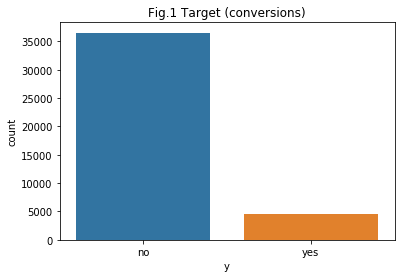

In [4]:
#exploring our data balance
print(df['y'].value_counts()/df['y'].count())
sns.countplot(data=df,x='y')
plt.title('Fig.1 Target (conversions)');

<p style="font-size:160%;font-family:georgia;color:navy">
    <strong>
        2. Data Exploration
        <br>
        <br>2.2. Features
        </strong>
    </p>

In [5]:
#spiting the dataframe into features X, and target y
X = df.drop(['y'],axis=1)
y = df.y

In [6]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

<a id="age"></a>
<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.1. Age</b>
    </p>
    
Average age in our sample is 40 years old, median of 38, and a standard deviation of 10 (0.25 the mean) which indicate that ages in our sample are not normally distributed, but not too far from a normal distribution.

Average age for clients who subscribed are slightly hier than clients who did not.

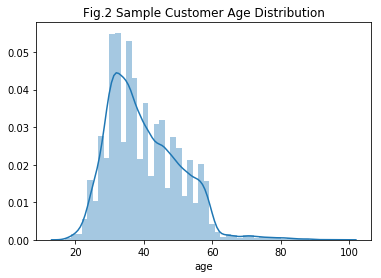

In [7]:
#let's explore visually the distribution of our sample age
sns.distplot(df['age'])
#sns.kdeplot(df['age'],bw=5,legend=False)
#sns.kdeplot(df['age'],bw=10,legend=False)
plt.title('Fig.2 Sample Customer Age Distribution');

In [8]:
print(X[['age']].describe().T)
print('')
print('Table 1')
print('---------------------')
df.groupby('y').mean()

       count      mean       std   min   25%   50%   75%   max
age  41188.0  40.02406  10.42125  17.0  32.0  38.0  47.0  98.0

Table 1
---------------------


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


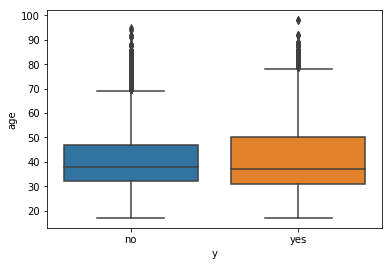

In [9]:
sns.boxplot(data=df,x='y',y='age')

<a id="job"></a>
<p style="font-size:160%;color:#000f2b;font-family:georgia">
    <b>
        Exploring Categorical Variables
        </b>
    </p>
    
<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.2. Job</b>
    </p>


25% of sample jobs is admin, 22% blue-collar, 16% technician
------------------------------------------------------------
job   unknown   student  unemployed  housemaid  self-employed  entrepreneur  \
age  0.008012  0.021244    0.024619   0.025736         0.0345       0.03535   

job  retired  management  services  technician  blue-collar    admin.  
age  0.04176    0.070992  0.096363    0.163713     0.224677  0.253035  


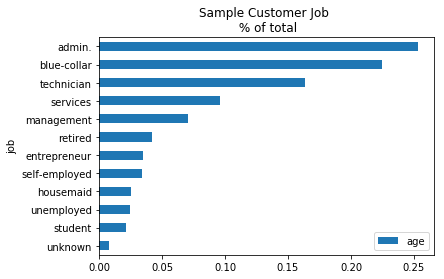

<Figure size 1008x576 with 0 Axes>

In [10]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
job = df.groupby('job')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('25% of sample jobs is admin, 22% blue-collar, 16% technician')
print('------------------------------------------------------------')
print(job.T)
job.plot(kind='barh')
plt.title('Sample Customer Job \n % of total')
plt.figure(figsize=(14,8))
plt.savefig('customer_job');

<a id="marital"></a>
<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.3. Marital Status</b>
    </p>

60% of sample customers are married, 28% single, 12% divorced
------------------------------------------------------------
marital   unknown  divorced    single   married
age      0.001942  0.111974  0.280859  0.605225


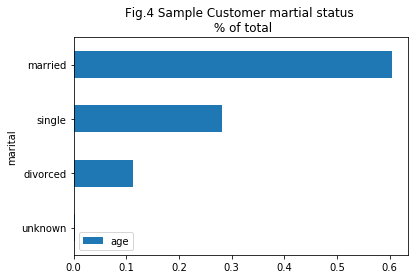

In [11]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
marital = df.groupby('marital')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('60% of sample customers are married, 28% single, 12% divorced')
print('------------------------------------------------------------')
print(marital.T)
marital.plot(kind='barh')
plt.title('Fig.4 Sample Customer martial status \n % of total');

<a id="education"></a>
<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.4. Education</b>
    </p>

30% of sample customers have a university degree
------------------------------------------------------------
education  illiterate   unknown  basic.6y  basic.4y  professional.course  \
age          0.000437  0.042027  0.055647  0.101389             0.127294   

education  basic.9y  high.school  university.degree  
age        0.146766     0.231014           0.295426  


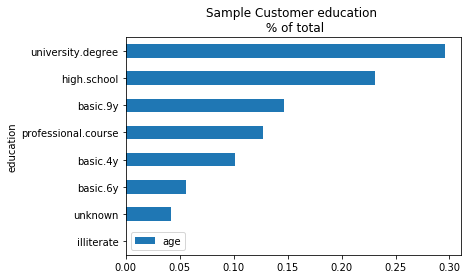

In [12]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
education = df.groupby('education')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('30% of sample customers have a university degree')
print('------------------------------------------------------------')
print(education.T)
education.plot(kind='barh')
plt.title('Sample Customer education \n % of total');

<a id="other"></a>
<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.5. Credit Default</b>
    </p>


------------------------------------------------------------
default       yes   unknown        no
age      0.000073  0.208726  0.791201


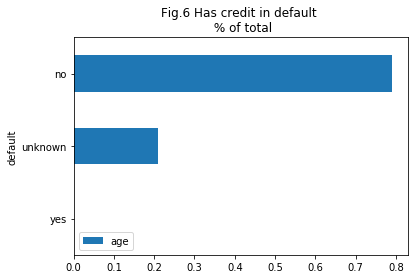

In [13]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
default = df.groupby('default')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('')
print('------------------------------------------------------------')
print(default.T)
default.plot(kind='barh')
plt.title('Fig.6 Has credit in default \n % of total');

<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.6. House Loan</b>
    </p>

52% of sample have a housing loan
------------------------------------------------------------
housing   unknown        no       yes
age      0.024036  0.452122  0.523842


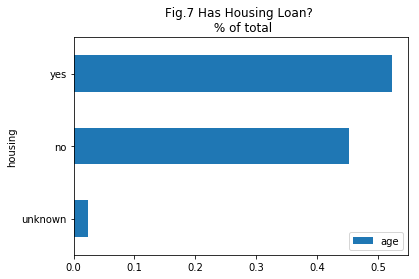

In [14]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
housing = df.groupby('housing')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('52% of sample have a housing loan')
print('------------------------------------------------------------')
print(housing.T)
housing.plot(kind='barh')
plt.title('Fig.7 Has Housing Loan? \n % of total');

<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.7. Personal Loan</b>
    </p>

82% of sample does not have a personal loan
------------------------------------------------------------
loan   unknown       yes        no
age   0.024036  0.151695  0.824269


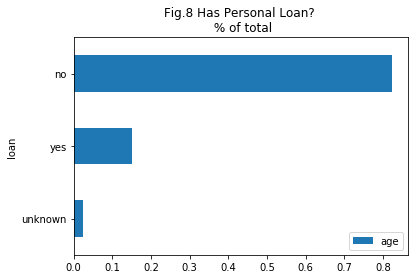

In [15]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
loan = df.groupby('loan')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('82% of sample does not have a personal loan')
print('------------------------------------------------------------')
print(loan.T)
loan.plot(kind='barh')
plt.title('Fig.8 Has Personal Loan? \n % of total');

<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.8. Communication Type</b>
    </p>


------------------------------------------------------------
contact  telephone  cellular
age       0.365252  0.634748


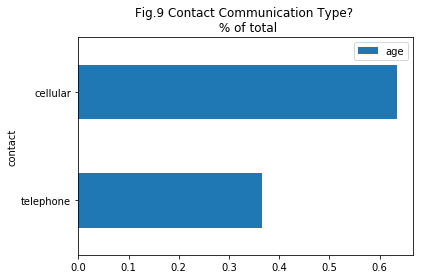

In [16]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
contact = df.groupby('contact')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('')
print('------------------------------------------------------------')
print(contact.T)
contact.plot(kind='barh')
plt.title('Fig.9 Contact Communication Type? \n % of total');

<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.9. Contact Month</b>
    </p>

most campaigns are made during summer time, except November
------------------------------------------------------------
month       dec       mar       sep       oct       apr       nov       jun  \
age    0.004419  0.013256  0.013839  0.017432  0.063902  0.099568  0.129115   

month       aug       jul       may  
age    0.149995  0.174177  0.334296  


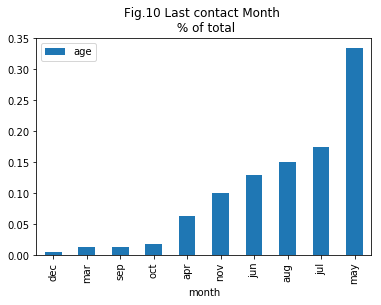

In [17]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
month = df.groupby('month')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('most campaigns are made during summer time, except November')
print('------------------------------------------------------------')
print(month.T)
month.plot(kind='bar')
plt.title('Fig.10 Last contact Month \n % of total');

<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.10. Day of Week</b>
    </p>

most campaigns are made during summer time, except November
------------------------------------------------------------
day_of_week       fri       tue       wed       mon       thu
age          0.190031  0.196416  0.197485  0.206711  0.209357


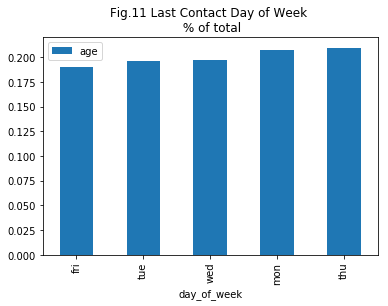

In [18]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
day_of_week = df.groupby('day_of_week')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('most campaigns are made during summer time, except November')
print('------------------------------------------------------------')
print(day_of_week.T)
day_of_week.plot(kind='bar')
plt.title('Fig.11 Last Contact Day of Week \n % of total');

<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.11. Number of Contacts</b>
    </p>

most campaigns are made during summer time, except November
------------------------------------------------------------
campaign         7         6         5         4         3         2         1
age       0.015271  0.023769  0.038822  0.064363  0.129674  0.256628  0.428329


<Figure size 864x576 with 0 Axes>

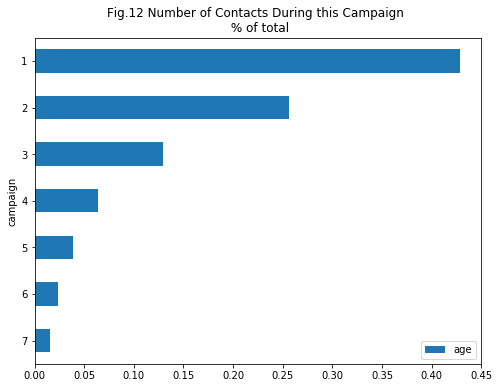

In [19]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
campaign = df.groupby('campaign')[['age']].count().sort_values(by='age')/df['age'].count()

#reducing noise by removing contact numbers that have less than 1% market share
campaign = campaign[campaign['age']>0.01]

#visualizing the distribution
print('most campaigns are made during summer time, except November')
print('------------------------------------------------------------')
print(campaign.T)
plt.figure(figsize=(12,8))
campaign.plot(kind='barh',figsize=(8,6))
plt.title('Fig.12 Number of Contacts During this Campaign \n % of total');

<p style="font-size:140%;font-family:georgia;color:black">
    <b>2.2.12. Previous Marketing Campaign</b>
    </p>

most campaigns are made during summer time, except November
------------------------------------------------------------
poutcome   success   failure  nonexistent
age       0.033335  0.103234     0.863431


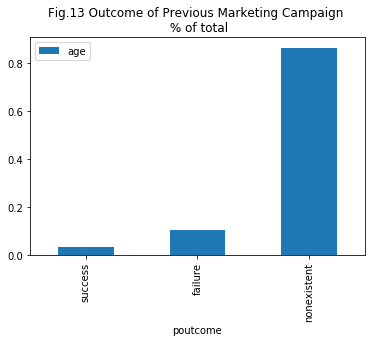

In [20]:
#adding distribution per job type into a data frame 
#note: using age filed to count values, this could be any column, age was selected randomly
poutcome = df.groupby('poutcome')[['age']].count().sort_values(by='age')/df['age'].count()

#visualizing the distribution
print('most campaigns are made during summer time, except November')
print('------------------------------------------------------------')
print(poutcome.T)
poutcome.plot(kind='bar')
plt.title('Fig.13 Outcome of Previous Marketing Campaign \n % of total');

<a id="feat_tar_rltn"></a>
<p style="font-size:160%;color:#000f2b;font-family:georgia">
    <b>
        3. Exploring Relationships between Features and Targert
        </b>
    </p>

* average age for clients who purchased is higher than client's who did not purchase
* days since last contacted is lower for clients how purchased
* number of calls during this campaign is lower for clients who purchased

In [21]:
cont_feat_y = df.groupby('y').mean().T

<a id="job_y"></a>

## 3.1. Conversion per Job
### Students (31% conversion), retirees (25%), and unemployed (14%) are the top 3 job categories to purchase
<p>
    <br>
    </p>

number of positive conversions by job type:
job
admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: yes, dtype: int64
-----------------------
percentage of converstion calculated by row total:
y                    no       yes
job                              
student        0.685714  0.314286
retired        0.747674  0.252326
unemployed     0.857988  0.142012
admin.         0.870274  0.129726
management     0.887825  0.112175
unknown        0.887879  0.112121
technician     0.891740  0.108260
self-employed  0.895144  0.104856
housemaid      0.900000  0.100000
entrepreneur   0.914835  0.085165
services       0.918619  0.081381
blue-collar    0.931057  0.068943


<Figure size 1008x576 with 0 Axes>

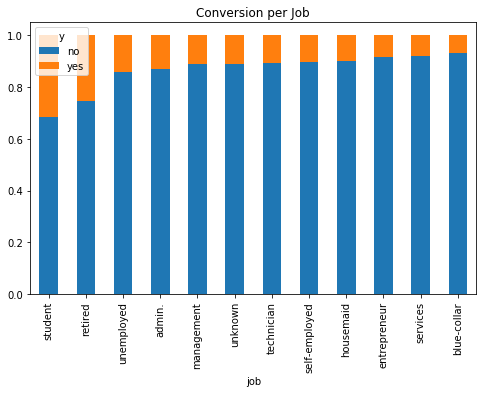

In [22]:
plt.figure(figsize=(14,8))
job_y = pd.crosstab(df.job,df.y)
job_y = job_y.div(job_y.sum(1).astype(float),axis=0)
print('number of positive conversions by job type:')
print(pd.crosstab(df.job,df.y).sort_values(by='yes',ascending=False)['yes'])
print('-----------------------')
print('percentage of converstion calculated by row total:')
print(job_y.sort_values(by='yes',ascending=False))
job_y.sort_values(by='yes',ascending=False).plot(kind='bar',stacked=True,figsize=(8,5))
plt.title("Conversion per Job");

#pd.crosstab(df.job,df.y).sort_values(by='yes')['yes'].plot(kind='barh')
#plt.title("Fig.3a Number of Positive Converstions (Purchase) by Job Type")
#plt.savefig('num_conversions_job');

In [23]:
students = df[df['job']=='student']

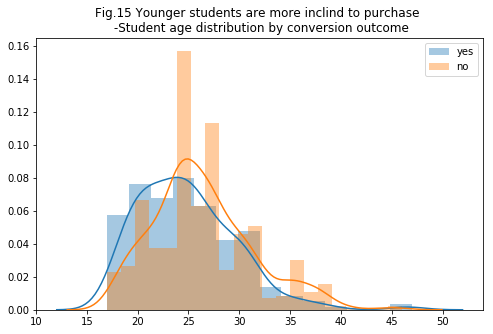

In [24]:
plt.figure(figsize=(8,5))
sns.distplot(students[['age']][students['y']=='yes'],label='yes')
sns.distplot(students[['age']][students['y']=='no'],label="no")
plt.title("Fig.15 Younger students are more inclind to purchase \n -Student age distribution by conversion outcome")
plt.legend();

<a id="marital_y"></a>
---
## 3.2. Conversions by Marital Status
Single have the highest conversion rates. Way to rationalize it is that people who are married probably already have a term deposit, or they have more family exenses so that they can't afford setting money aside in a term deposit.

y               no       yes
marital                     
unknown   0.850000  0.150000
single    0.859959  0.140041
divorced  0.896791  0.103209
married   0.898427  0.101573


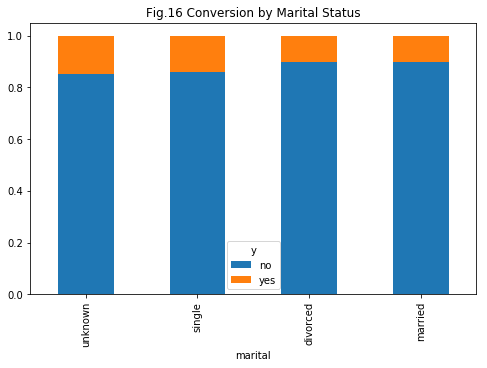

In [26]:
marital_y = pd.crosstab(df.marital,df.y)
marital_y = marital_y.div(marital_y.sum(1).astype(float),axis=0)
print(marital_y.sort_values(by='yes',ascending=False))
marital_y.sort_values(by='yes',ascending=False).plot(kind='bar',stacked=True,figsize=(8,5))
plt.title('Fig.16 Conversion by Marital Status');

<a id="education_y"></a>
---
## 3.3. Conversion by Education
* People with basic education have the lowest conversion rates. 
* On the other hand, Illetirate people (0.04% of our sample), have the highest conversion rates. 
* University degree and professional course holders have conversion rates of 14% and 11% respectively

y                          no       yes
education                              
illiterate           0.777778  0.222222
unknown              0.854997  0.145003
university.degree    0.862755  0.137245
professional.course  0.886515  0.113485
high.school          0.891645  0.108355
basic.4y             0.897510  0.102490
basic.6y             0.917976  0.082024
basic.9y             0.921754  0.078246
                          age
education                    
illiterate           0.000437
unknown              0.042027
basic.6y             0.055647
basic.4y             0.101389
professional.course  0.127294
basic.9y             0.146766
high.school          0.231014
university.degree    0.295426


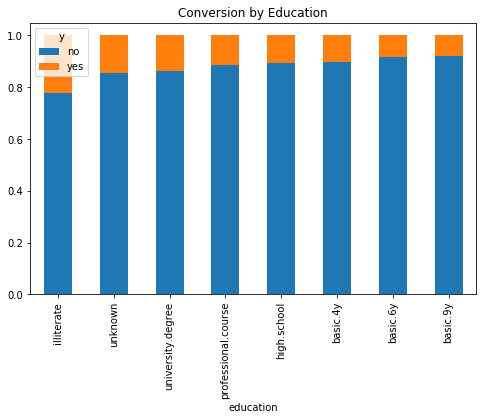

In [27]:
education_y = pd.crosstab(df.education,df.y)
education_y = education_y.div(education_y.sum(1).astype(float),axis=0)
print(education_y.sort_values(by='yes',ascending=False))
education_y.sort_values(by='yes',ascending=False).plot(kind='bar',stacked=True,figsize=(8,5));
plt.title('Conversion by Education')
print(education)

<a id="month_y"></a>
---
## 3.4. Conversion by Call Month and by Call Day

### Day of Week seems to have low variance and therefore will not be an effective predictor

y                  no       yes
day_of_week                    
thu          0.878812  0.121188
tue          0.882200  0.117800
wed          0.883329  0.116671
fri          0.891913  0.108087
mon          0.900517  0.099483


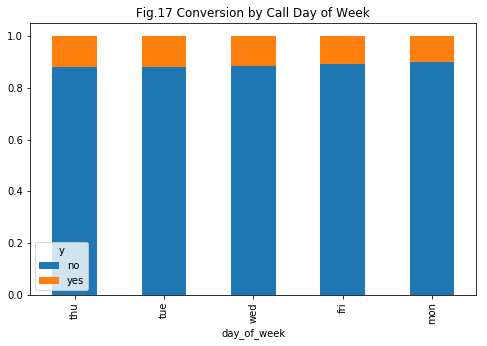

In [28]:
day_y = pd.crosstab(df.day_of_week,df.y)
day_y = day_y.div(day_y.sum(1).astype(float),axis=0)
print(day_y.sort_values(by='yes',ascending=False))
day_y.sort_values(by='yes',ascending=False).plot(kind='bar',stacked=True,figsize=(8,5))
plt.title('Fig.17 Conversion by Call Day of Week');

### Interestingly, months were we have most volume of calls (May, Jul, Aug, Jun) have the the lowest conversion rates. 

### Conversly, months with lowest calls volumes (Mar, Sep, Oct, Dec)  have the highest conversion rates.

<p style="font-size:160%;color:Tomato;font-family:georgia">
    <b>Month of call seems to be a good predictor to conversion result</b>
    </p>

            age
month          
dec    0.004419
mar    0.013256
sep    0.013839
oct    0.017432
apr    0.063902
nov    0.099568
jun    0.129115
aug    0.149995
jul    0.174177
may    0.334296
y            no       yes
month                    
mar    0.494505  0.505495
dec    0.510989  0.489011
sep    0.550877  0.449123
oct    0.561281  0.438719
apr    0.795213  0.204787
aug    0.893979  0.106021
jun    0.894885  0.105115
nov    0.898561  0.101439
jul    0.909534  0.090466
may    0.935653  0.064347


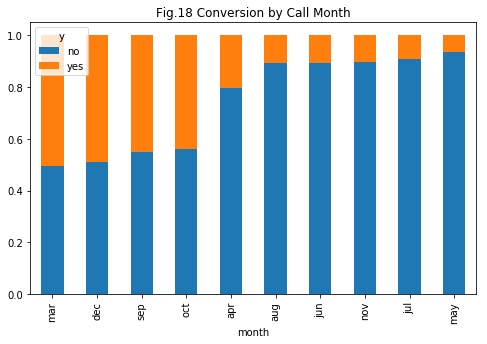

In [29]:
month_y = pd.crosstab(df.month,df.y)
month_y = month_y.div(month_y.sum(1).astype(float),axis=0)
print(month)
print(month_y.sort_values(by='yes',ascending=False))
month_y.sort_values(by='yes',ascending=False).plot(kind='bar',stacked=True,figsize=(8,5))
plt.title('Fig.18 Conversion by Call Month');

## conclusion

* Age have an impact on the outcome of the call
* Marital Status could be a good predictor as singles have higher conversion rates
* Job could be a good predictor as students, retirees, and unemployed have higher conversion rates
<p style="color:red">We should note that the three categories mentioned above are minority within our sample</p>
* Month of the call is a good predictor as Mar, Sep, Oct, Dec have the highest conversion rates
<a id="conc"></a>

---